<a href="https://colab.research.google.com/github/UdayBairapaka/Hotel_Prediction/blob/main/Hotel_prediction_uday_bairapaka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Basic and most important libraries**

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Classifiers**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier,RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

**Model evaluation tools**

In [ ]:
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

**Data processing functions**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/hotel_bookings.csv")
data.head(5)

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              07-01-2015  
1              07-01-2015  
2              07-02-2015  
3              07-02-2015  
4              07-03-2015  

[5 rows x 32 columns]

In [ ]:
data.shape

(119390, 32)

In [ ]:
data.dtypes

hotel                               int64
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                  int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                                int64
country                             int64
market_segment                      int64
distribution_channel                int64
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                  int64
assigned_room_type                  int64
booking_changes                     int64
deposit_type                        int64
agent                             

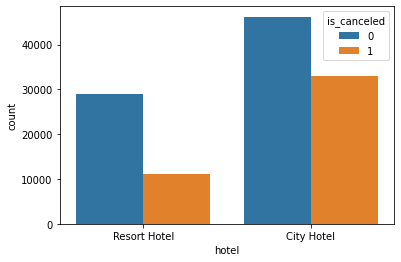

In [ ]:
sns.countplot(x="hotel",hue="is_canceled",data=data)

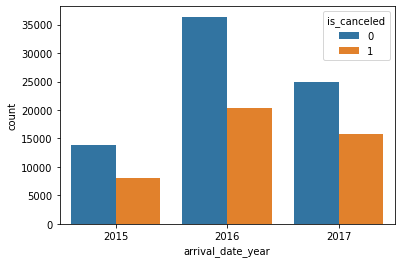

In [ ]:
sns.countplot(x="arrival_date_year",hue="is_canceled",data=data)

In [ ]:
correlation_mat = data.corr()

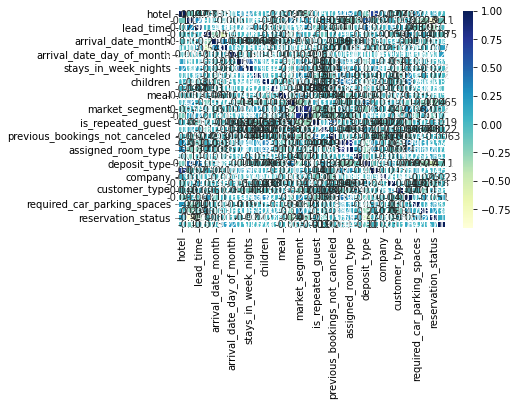

In [ ]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

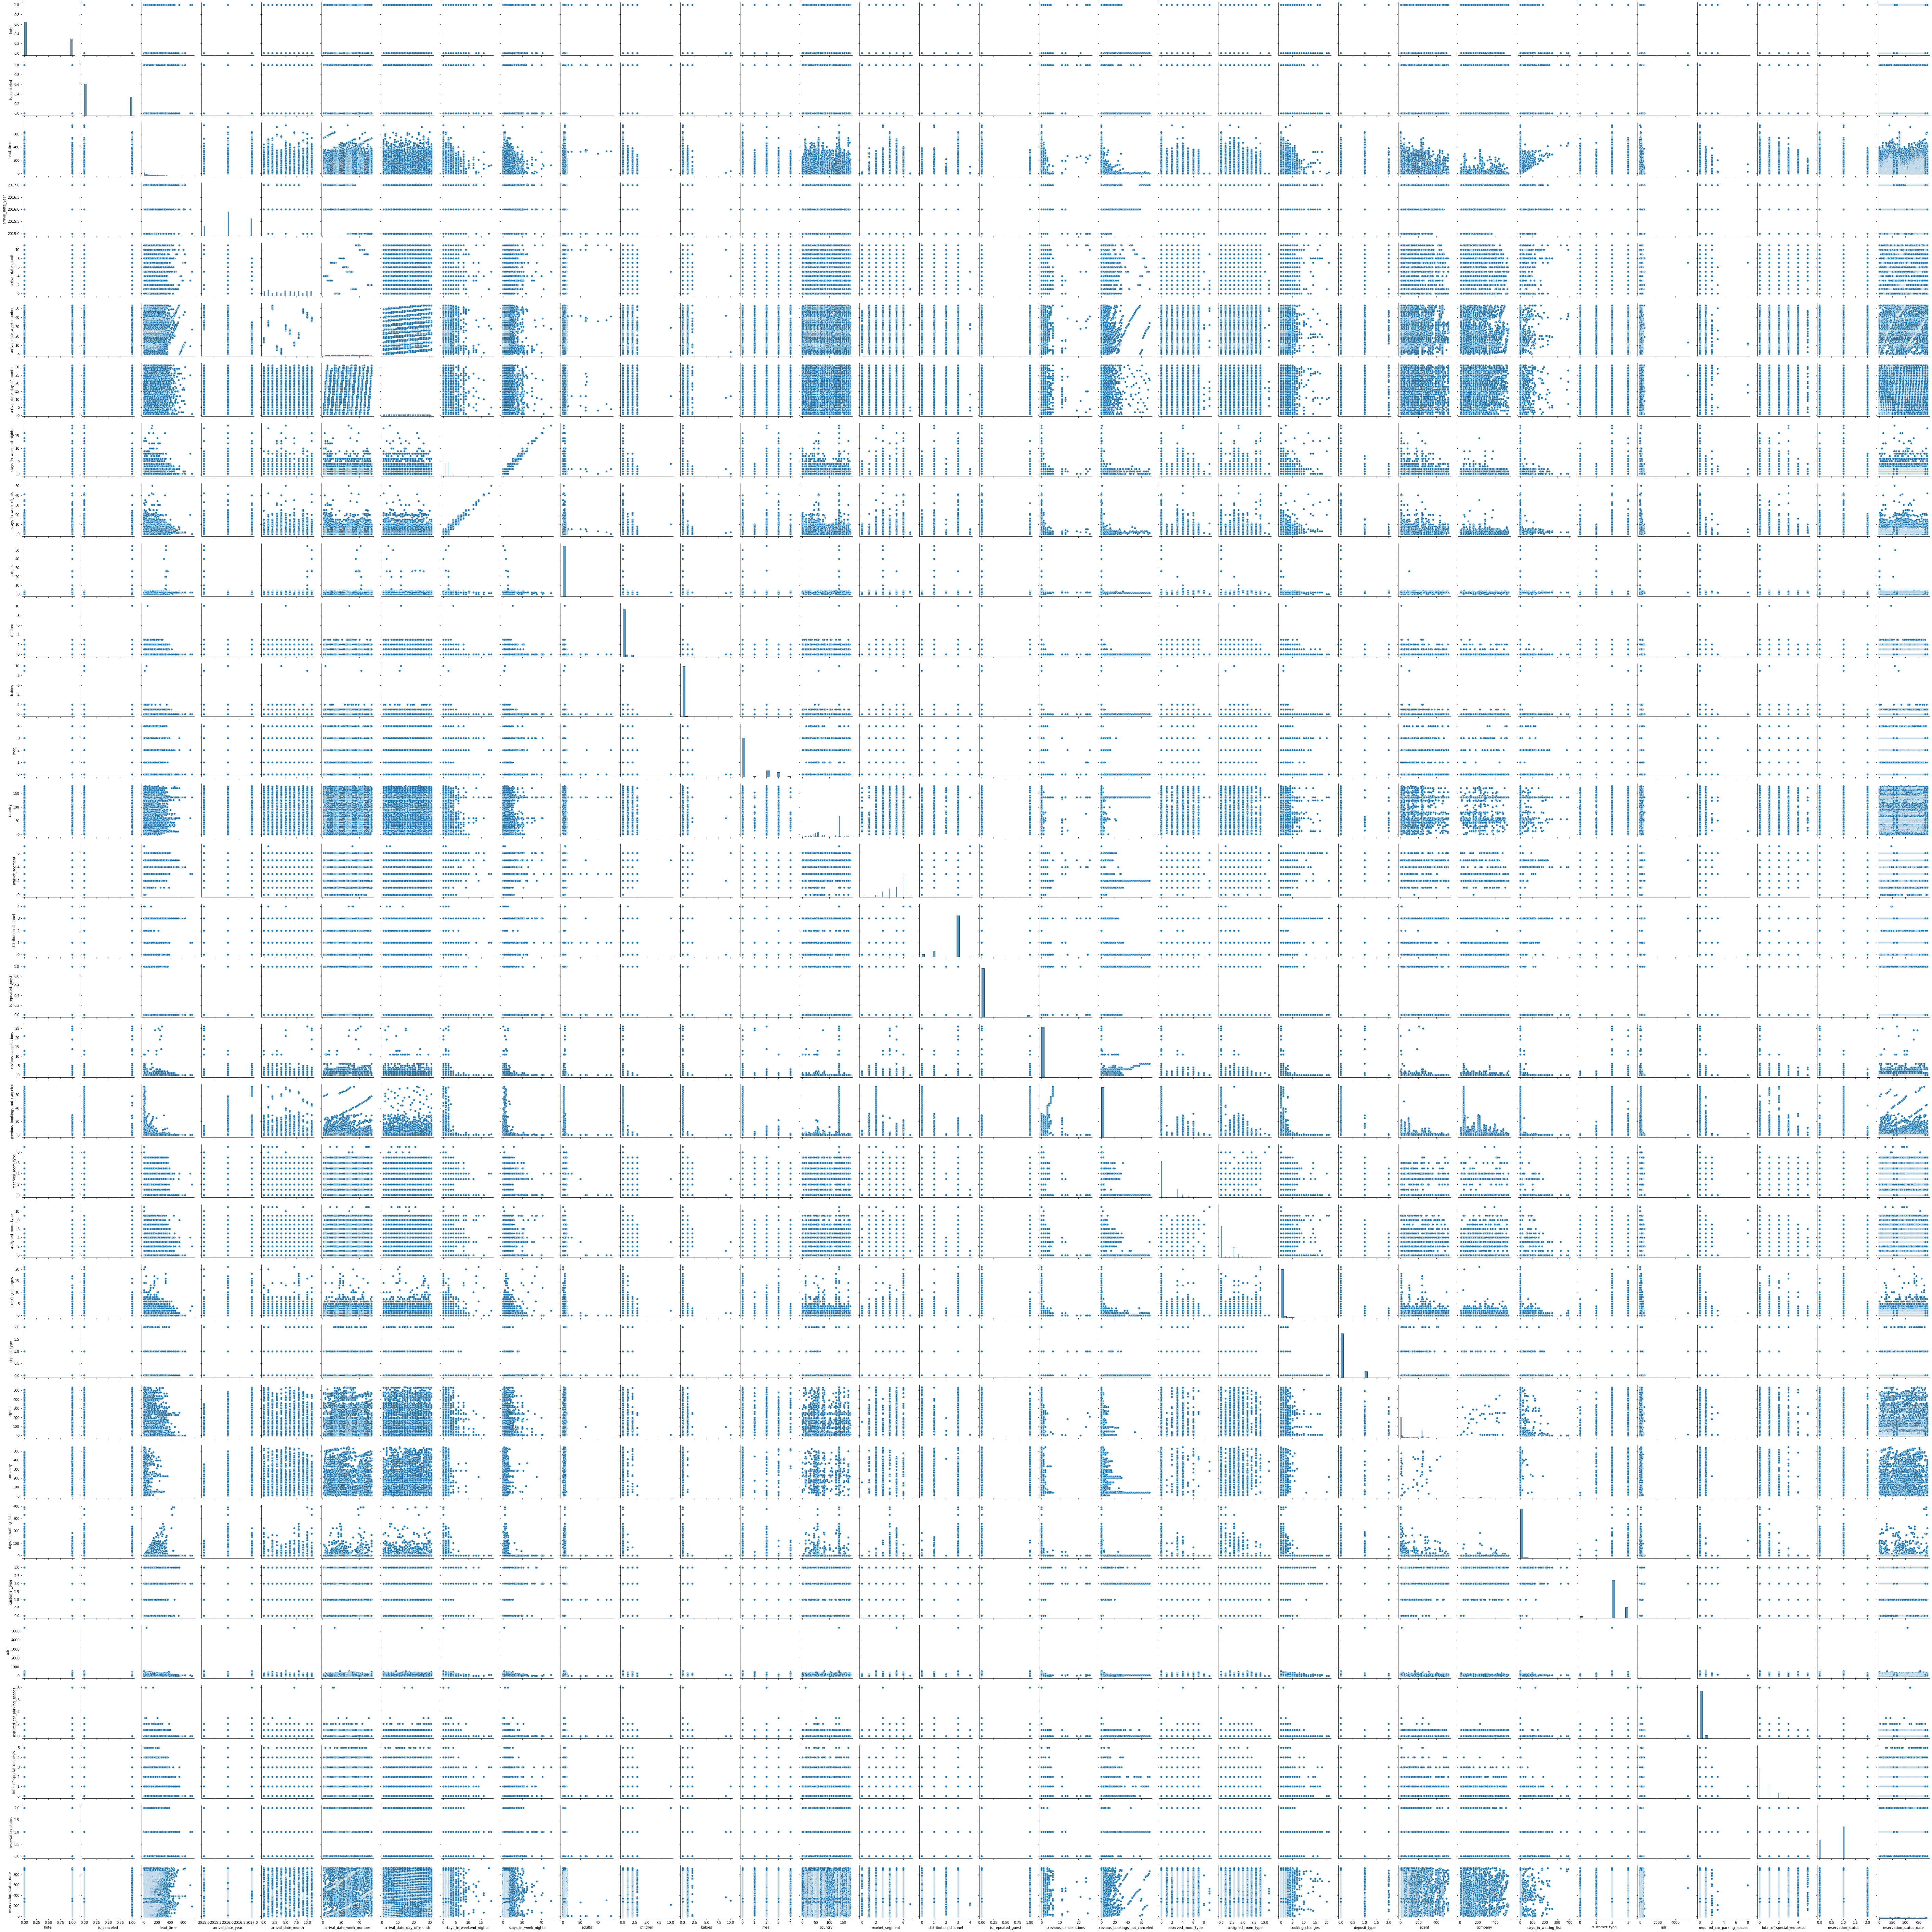

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data.describe()

hotel    is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000  119390.000000      119390.000000   
mean        0.335539       0.370416     104.011416        2016.156554   
std         0.472181       0.482918     106.863097           0.707476   
min         0.000000       0.000000       0.000000        2015.000000   
25%         0.000000       0.000000      18.000000        2016.000000   
50%         0.000000       0.000000      69.000000        2016.000000   
75%         1.000000       1.000000     160.000000        2017.000000   
max         1.000000       1.000000     737.000000        2017.000000   

       arrival_date_month  arrival_date_week_number  \
count       119390.000000             119390.000000   
mean             5.490544                 27.165173   
std              3.535075                 13.605138   
min              0.000000                  1.000000   
25%              2.000000                 16.000000   
50%              6.000000                 28.000000   
75%              8.000000                 38.000000   
max             11.000000                 53.000000   

       arrival_date_day_of_month  stays_in_weekend_nights  \
count              119390.000000            119390.000000   
mean                   15.798241                 0.927599   
std                     8.780829                 0.998613   
min                     1.000000                 0.000000   
25%                     8.000000                 0.000000   
50%                    16.000000                 1.000000   
75%                    23.000000                 2.000000   
max                    31.000000                19.000000   

       stays_in_week_nights         adults  ...   deposit_type          agent  \
count         119390.000000  119390.000000  ...  119390.000000  119390.000000   
mean               2.500302       1.856403  ...       0.124893      76.744392   
std                1.908286       0.579261  ...       0.334678     105.904658   
min                0.000000       0.000000  ...       0.000000       1.000000   
25%                1.000000       2.000000  ...       0.000000       9.000000   
50%                2.000000       2.000000  ...       0.000000      14.000000   
75%                3.000000       2.000000  ...       0.000000     152.000000   
max               50.000000      55.000000  ...       2.000000     535.000000   

             company  days_in_waiting_list  customer_type            adr  \
count  119390.000000         119390.000000  119390.000000  119390.000000   
mean      179.584496              2.321149       2.137323     101.831122   
std        31.500968             17.594721       0.577040      50.535790   
min         6.000000              0.000000       0.000000      -6.380000   
25%       179.000000              0.000000       2.000000      69.290000   
50%       179.000000              0.000000       2.000000      94.575000   
75%       179.000000              0.000000       2.000000     126.000000   
max       543.000000            391.000000       3.000000    5400.000000   

       required_car_parking_spaces  total_of_special_requests  \
count                119390.000000              119390.000000   
mean                      0.062518                   0.571363   
std                       0.245291                   0.792798   
min                       0.000000                   0.000000   
25%                       0.000000                   0.000000   
50%                       0.000000                   0.000000   
75%                       0.000000                   1.000000   
max                       8.000000                   5.000000   

       reservation_status  reservation_status_date  
count       119390.000000            119390.000000  
mean             0.649803               456.047064  
std              0.497776               266.677673  
min              0.000000                 0.000000  
25%              0.000000               233.0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

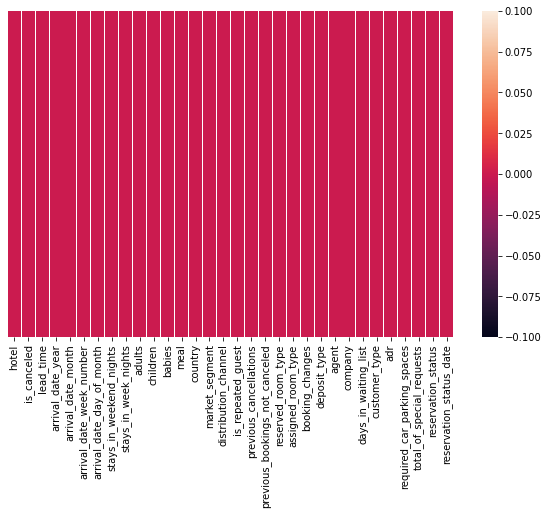

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

**Prepare data for model training i.e. removing ouliers , filling null values**

In [ ]:
print(data["hotel"].value_counts())
print(data["arrival_date_month"].value_counts())
print(data["meal"].value_counts())
print(data["country"].value_counts())
print(data["market_segment"].value_counts())
print(data["distribution_channel"].value_counts())
print(data["reserved_room_type"].value_counts())
print(data["assigned_room_type"].value_counts())
print(data["deposit_type"].value_counts())
print(data["customer_type"].value_counts())
print(data["reservation_status_date"].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64
A   

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

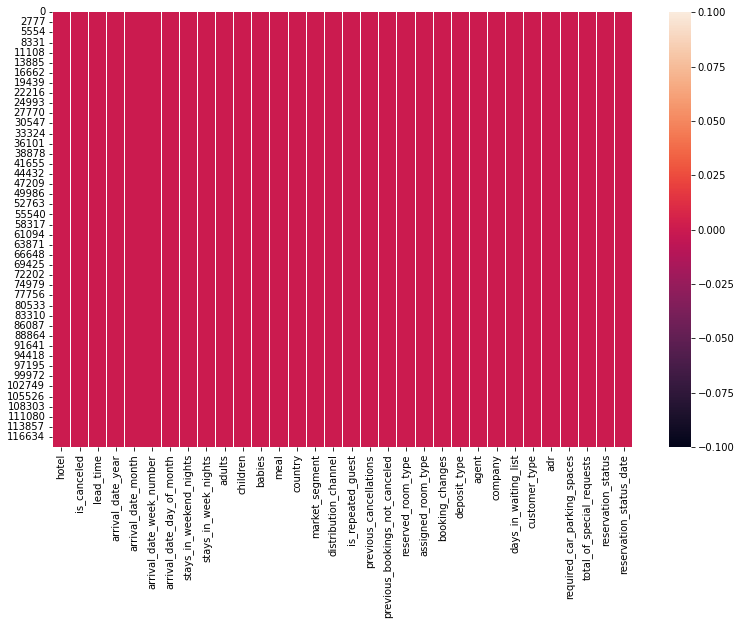

In [ ]:
data["hotel"].fillna(data["hotel"].mode()[0],inplace=True)
data["arrival_date_month"].fillna(data["arrival_date_month"].mode()[0],inplace=True)
data["meal"].fillna(data["meal"].mode()[0],inplace=True)
data["country"].fillna(data["country"].mode()[0],inplace=True)
data["market_segment"].fillna(data["market_segment"].mode()[0],inplace=True)
data["distribution_channel"].fillna(data["distribution_channel"].mode()[0],inplace=True)
data["reserved_room_type"].fillna(data["reserved_room_type"].mode()[0],inplace=True)
data["assigned_room_type"].fillna(data["assigned_room_type"].mode()[0],inplace=True)
data["deposit_type"].fillna(data["deposit_type"].mode()[0],inplace=True)
data["customer_type"].fillna(data["customer_type"].mode()[0],inplace=True)
data["reservation_status_date"].fillna(data["reservation_status_date"].mode()[0],inplace=True)
data["agent"].fillna(data["agent"].median(),inplace=True)
data["company"].fillna(data["company"].median(),inplace=True)



print(data.isnull().sum())

#Heat map for null values
plt.figure(figsize=(13,8))
sns.heatmap(data.isnull())

we know that fit means normalization le.fit means encoding

In [ ]:
data["hotel"] = le.fit_transform(data["hotel"])
data["arrival_date_month"] = le.fit_transform(data["arrival_date_month"])
data["meal"] = le.fit_transform(data["meal"])
data["country"] = le.fit_transform(data["country"])
data["market_segment"] = le.fit_transform(data["market_segment"])
data["distribution_channel"] = le.fit_transform(data["distribution_channel"])
data["reserved_room_type"] = le.fit_transform(data["reserved_room_type"])
data["assigned_room_type"] = le.fit_transform(data["assigned_room_type"])
data["deposit_type"] = le.fit_transform(data["deposit_type"])
data["customer_type"] = le.fit_transform(data["customer_type"])
data["reservation_status"] = le.fit_transform(data["reservation_status"])
data["reservation_status_date"] = le.fit_transform(data["reservation_status_date"])
data["children"].fillna(data["children"].median(),inplace=True)
data["country"].fillna(data["country"].mode()[0],inplace=True)
data["agent"].fillna(data["agent"].median(),inplace=True)
data["company"].fillna(data["company"].median(),inplace=True)

#data = pd.get_dummies(data)
data.head(8)

hotel  is_canceled  lead_time  arrival_date_year  arrival_date_month  \
0      1            0        342               2015                   5   
1      1            0        737               2015                   5   
2      1            0          7               2015                   5   
3      1            0         13               2015                   5   
4      1            0         14               2015                   5   
5      1            0         14               2015                   5   
6      1            0          0               2015                   5   
7      1            0          9               2015                   5   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   
5                        27                          1   
6                        27                          1   
7                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...             0   
1                        0                     0       2  ...             0   
2                        0                     1       1  ...             0   
3                        0                     1       1  ...             0   
4                        0                     2       2  ...             0   
5                        0                     2       2  ...             0   
6                        0                     2       2  ...             0   
7                        0                     2       2  ...             0   

   agent  company  days_in_waiting_list  customer_type    adr  \
0   14.0    179.0                     0              2    0.0   
1   14.0    179.0                     0              2    0.0   
2   14.0    179.0                     0              2   75.0   
3  304.0    179.0                     0              2   75.0   
4  240.0    179.0                     0              2   98.0   
5  240.0    179.0                     0              2   98.0   
6   14.0    179.0                     0              2  107.0   
7  303.0    179.0                     0              2  103.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0                   1   
1                            0                          0                   1   
2                            0                          0                   1   
3                            0                          0                   1   
4                            0                          1                   1   
5                            0                          1                   1   
6                            0                          0                   1   
7                            0                          1                   1   

   reservation_status_date  
0                      190  
1                      190  
2                      193  
3                      193  
4                      196  
5                      196  
6                      196  
7                      196  

[8 rows x 32 columns]

Dividing data into Input X variables and Target Y variable

In [ ]:
X = data.drop(["is_canceled","hotel"],axis=1)
y = data["is_canceled"]

logstictic regression

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
model=LogisticRegression(solver="liblinear")

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7463175906094074
0.7432504118156182


In [ ]:
y_predict = model.predict(X_test)

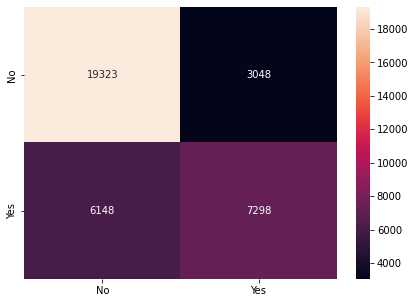

In [ ]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree.score(X_train,y_train)

1.0

In [ ]:
dtree.score(X_test,y_test)

1.0

In [ ]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))

1.0


In [ ]:
y_predict = dTreeR.predict(X_test)

In [ ]:
print(dTreeR.score(X_test, y_test))

1.0


In [ ]:
from sklearn import metrics

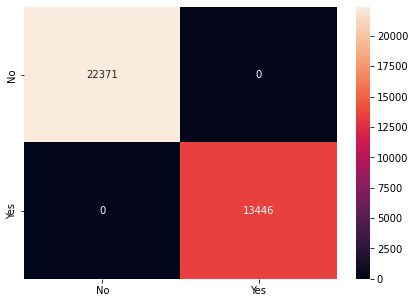

In [ ]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'poly', degree = 2)
svm.fit(X_train, y_train)

SVC(degree=2, kernel='poly')

In [ ]:
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 160, random_state=0,max_features=3)
rfcl = rfcl.fit(X_train, y_train)


0.9979897813887261


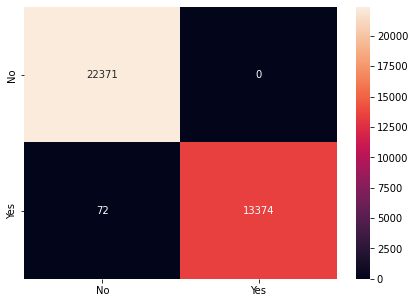

In [ ]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')